In [1]:
library("ggplot2")
library("readxl")
library("forecast")
library("tseries")
library("urca")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'tseries' was built under R version 3.6.3"Warning message:
"package 'urca' was built under R version 3.6.3"

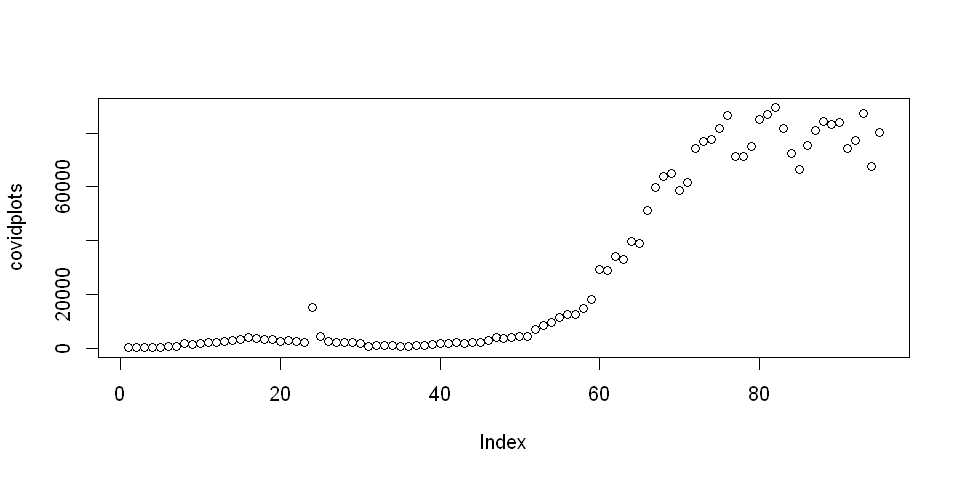

In [15]:
options(repr.plot.width=8, repr.plot.height=4)
covid<-data.frame(read_excel("C:/Users/avakk/Downloads/ccovid.xlsx"))

val<-paste(covid$year,"-",covid$month,"-",covid$day,sep = "")
covid$dateRep<-val
covid$dateRep<-as.Date(covid$dateRep)

total_cases_by_date<-aggregate(covid$cases,by=list(covid$dateRep),FUN=sum)
total_cases_by_date<-tail(total_cases_by_date,-21)
covidplots<-total_cases_by_date$x

plot(covidplots)

In [3]:
train<-head(covidplots,round(length(covidplots)*0.75))
d<-length(covidplots)-length(train)
test<-tail(covidplots,d)
length(test)
param<-auto.arima(train)
param

[1] 24

Series: train 
ARIMA(1,2,1) 

Coefficients:
          ar1      ma1
      -0.2015  -0.8780
s.e.   0.1251   0.0595

sigma^2 estimated as 10828510:  log likelihood=-656.63
AIC=1319.27   AICc=1319.63   BIC=1325.97

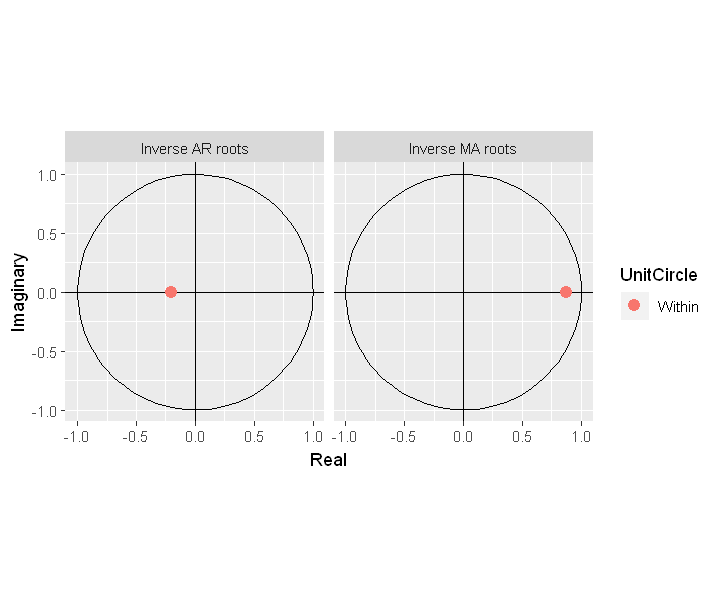

In [14]:
options(repr.plot.width=6, repr.plot.height=5)
plotfit<-arima(train,c(1,2,1))
autoplot(plotfit)


	Ljung-Box test

data:  Residuals from ARIMA(1,2,1)
Q* = 9.9462, df = 8, p-value = 0.2688

Model df: 2.   Total lags used: 10



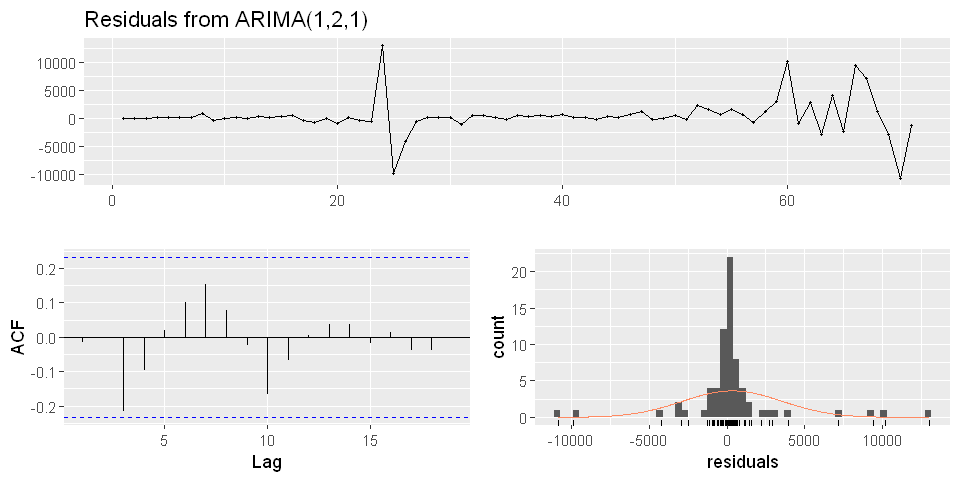

In [7]:
options(repr.plot.width=8, repr.plot.height=4)
checkresiduals(plotfit)

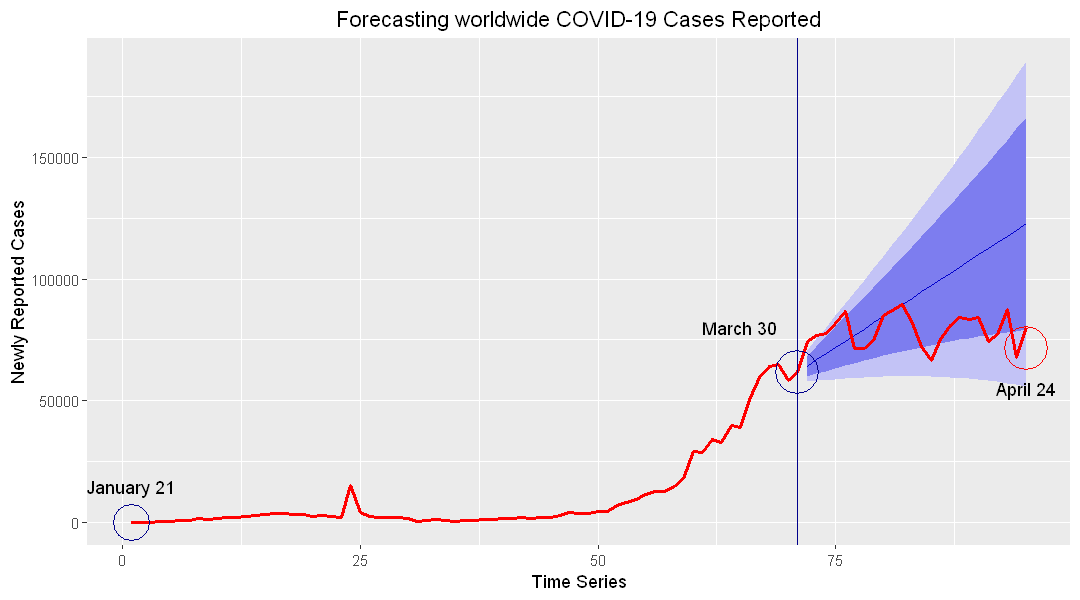

In [12]:
options(repr.plot.width=9, repr.plot.height=5)
p<-ts(total_cases_by_date$x)
autoplot(forecast(plotfit,h=24))+autolayer(p,size=1.1,color="red")+
  ggtitle("Forecasting worldwide COVID-19 Cases Reported")+labs(y="Newly Reported Cases", x = "Time Series")+
  theme(plot.title = element_text(hjust = 0.5))+geom_vline(xintercept = 71,color="darkblue")+
  annotate(geom="text",x=1,y=15000,label="January 21")+
  annotate(geom="point", x=1,y=153,size=10,shape=21,fill="transparent",color="darkblue")+
  annotate(geom="text",x=65,y=80000,label="March 30")+
  annotate(geom="point", x=71,y=61808,size=12,shape=21,fill="transparent",color="darkblue")+
  annotate(geom="text",x=95,y=55000,label="April 24")+
  annotate(geom="point", x=95,y=71392,size=12,shape=21,fill="transparent",color="red")

In [17]:
f<-forecast(plotfit)

forecastvalues<-data.frame(forecast(plotfit,h=24))
fvalues<-forecastvalues$Point.Forecast
fvalues<-ceiling(fvalues)

accuracy(fvalues,test)

,ME,RMSE,MAE,MPE,MAPE
Test set,-14644.58,23562.56,18890.75,-19.32991,24.66839
